## MACHINE LEARNING SUPERVISED REGRESSION 

**Project Done by : Bharath K M**

#### About the Dataset 

## Airline Data

### Predictor Variables 


**Airline** : List of Airlines

**Date** : Departure Date

**Departure Station** - Departure Station Name

**Arrival Station** - Arrival Station Name

**Route Map** - Airline route along with intermidiate station

**Departure Time** - Departure Time 

**Arrival Time** - Arrival Time 

**Journey Time** - Journey Time

**Stops** - Number of stops [Intermidiate Stations]

**Extra info** - Other info

**Distance** - Distance between Departure and Arrival Station
    
### Traget Variable 


**Price** - Price of Airline for a trip 
    

# 1. Data Pre-processing

**Import the required libraries**

In [3]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing



from warnings import filterwarnings
filterwarnings('ignore')


**Load the CSV file**

In [4]:
df_airline = pd.read_excel("airfare_CT3-1.xlsx")
df_airline.head(3)

,Airline,Date,Departure Station,Arrival Station,Route Map,Departure Time,Arrival Time,Journey Time,Stops,Extra Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882


In [5]:
df_airline.shape

(9000, 11)

In [6]:
df_airline.keys()

Index(['Airline', 'Date', 'Departure Station', 'Arrival Station', 'Route Map',
       'Departure Time', 'Arrival Time', 'Journey Time', 'Stops', 'Extra Info',
       'Price'],
      dtype='object')

In [7]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Airline            9000 non-null   object
 1   Date               9000 non-null   object
 2   Departure Station  9000 non-null   object
 3   Arrival Station    9000 non-null   object
 4   Route Map          9000 non-null   object
 5   Departure Time     9000 non-null   object
 6   Arrival Time       9000 non-null   object
 7   Journey Time       9000 non-null   object
 8   Stops              9000 non-null   object
 9   Extra Info         9000 non-null   object
 10  Price              9000 non-null   int64 
dtypes: int64(1), object(10)
memory usage: 773.6+ KB


### Prepare the data

In [8]:
df_airline.describe()

,Price
count,9000.000000
mean,9087.764333
std,4605.498942
min,1759.000000
25%,5228.000000
50%,8369.000000
75%,12373.000000
max,79512.000000


In [9]:
df_airline.dtypes

Airline              object
Date                 object
Departure Station    object
Arrival Station      object
Route Map            object
Departure Time       object
Arrival Time         object
Journey Time         object
Stops                object
Extra Info           object
Price                 int64
dtype: object

We can see from the above result that we have price as a numerical data with dtype int and the other data type as object.

#### Perform missing value analysis

In [10]:
# sort the variables on the basis of total null values in the variable
# 'isnull().sum()' returns the number of missing values in each variable

missing_total = df_airline.isnull().sum()
print(missing_total)

Airline              0
Date                 0
Departure Station    0
Arrival Station      0
Route Map            0
Departure Time       0
Arrival Time         0
Journey Time         0
Stops                0
Extra Info           0
Price                0
dtype: int64


There are no missing values present in the given dataset

In [11]:
print(df_airline['Departure Station'].unique())

['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']


### Replacing the departure values as per the station code

In [12]:
df_airline['Departure Station'] = df_airline['Departure Station'].replace({'Banglore':'BLR',
                                                                          'Delhi' : 'DEL',
                                                                          'Kolkata' : 'CCU',
                                                                          'Chennai' : 'MAA',
                                                                          'Mumbai' : 'BOM'})
print(df_airline['Departure Station'].unique())

['BLR' 'CCU' 'DEL' 'MAA' 'BOM']


**We have replaced the the departure station values as per the location code**

## Replacing arrival station values as per the location code 

In [13]:
print(df_airline['Arrival Station'].unique())

['New Delhi' 'Banglore' 'Cochin' 'Kolkata' 'Delhi' 'Hyderabad']


In [14]:
df_airline['Arrival Station'] = df_airline['Arrival Station'].replace({'Banglore':'BLR',
                                                                       'New Delhi' : 'DEL',
                                                                       'Cochin' : 'COK',
                                                                        'Hyderabad' : 'HYD',
                                                                          'Delhi' : 'DEL',
                                                                          'Kolkata' : 'CCU',
                                                                          'Chennai' : 'MAA',
                                                                          'Mumbai' : 'BOM'})
print(df_airline['Arrival Station'].unique())

['DEL' 'BLR' 'COK' 'CCU' 'HYD']


### Cleaning Extra info variable

In [15]:
print(df_airline['Extra Info'].unique())

['No info' 'In-flight meal not included' 'No check-in baggage included'
 '1 Short layover' 'No Info' '1 Long layover' 'Change airports'
 'Business class' 'Red-eye flight']


In [16]:
# There are two no info's {No info & No Info}.... Clearing those as the first step

df_airline['Extra Info'] = df_airline['Extra Info'].replace({"No info":"No Info"})

In [17]:
print(df_airline['Extra Info'].unique())

['No Info' 'In-flight meal not included' 'No check-in baggage included'
 '1 Short layover' '1 Long layover' 'Change airports' 'Business class'
 'Red-eye flight']


In [18]:
df_airline.groupby('Extra Info') ['Extra Info'].count()

Extra Info
1 Long layover                    17
1 Short layover                    1
Business class                     3
Change airports                    4
In-flight meal not included     1649
No Info                         7055
No check-in baggage included     270
Red-eye flight                     1
Name: Extra Info, dtype: int64

In [19]:
## Assigning the categories using map function for the above categories shown in the result

df_airline['Extra Info'] = df_airline['Extra Info'].map({
    'No Info':0,
    'In-flight meal not included':1,
    'No check-in baggage included':2,
    '1 Long layover': 3,
    'Change airports':4,
    'Business class':5,
    '1 Short layover':6,
    'Red-eye flight':7
})

In [20]:
print(df_airline['Extra Info'].unique())

[0 1 2 6 3 4 5 7]


### Cleaning Stops variabel

In [21]:
print(df_airline['Stops'].unique())

['non-stop' '2 stops' '1 stop' '3 stops']


In [22]:
df_airline['Stops'] = df_airline['Stops'].replace({'non-stop': 0,
                                                   '1 stop' : 1,
                                                   '2 stops': 2,
                                                  '3 stops':3})

In [23]:
print(df_airline['Stops'].unique())

[0 2 1 3]


### Creating Day, Month, year variable from Date variable

In [24]:
df_airline.head(2)

,Airline,Date,Departure Station,Arrival Station,Route Map,Departure Time,Arrival Time,Journey Time,Stops,Extra Info,Price
0,IndiGo,24/03/2019,BLR,DEL,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,0,3897
1,Air India,1/05/2019,CCU,BLR,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,0,7662


In [25]:
df_airline['Day'],df_airline['Month'],df_airline['Year'] = df_airline['Date'].str.split('/',3).str

In [26]:
df_airline.head(2)

,Airline,Date,Departure Station,Arrival Station,Route Map,Departure Time,Arrival Time,Journey Time,Stops,Extra Info,Price,Day,Month,Year
0,IndiGo,24/03/2019,BLR,DEL,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,0,3897,24,03,2019
1,Air India,1/05/2019,CCU,BLR,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,0,7662,1,05,2019


### Dropping unwanted columns from the dataset

In [27]:
df_airline.drop('Date', axis='columns', inplace=True)
df_airline.drop('Arrival Time', axis='columns', inplace=True)
df_airline.drop('Year', axis='columns', inplace=True)

In [28]:
df_airline.head(2)

,Airline,Departure Station,Arrival Station,Route Map,Departure Time,Journey Time,Stops,Extra Info,Price,Day,Month
0,IndiGo,BLR,DEL,BLR → DEL,22:20,2h 50m,0,0,3897,24,03
1,Air India,CCU,BLR,CCU → IXR → BBI → BLR,05:50,7h 25m,2,0,7662,1,05


In [29]:
df_airline.shape

(9000, 11)

## 3. Feature Engineering

### Calculating distance

In [30]:
df_air_distance = pd.read_csv("air_distance.csv")

In [31]:
df_air_distance.head(2)

,Unnamed: 0,Source,Dest,Distance(Km)
0,0,BLR,DEL,1709.71
1,1,CCU,IXR,327.84


In [32]:
import math

def getDistance(route):
    distance = 0.0
    route="".join(route.split())
    routeArray = route.split('→')
    i=0
    if len(routeArray) > 1:
        while i < (len(routeArray)-1):
            df_dist = df_air_distance[(df_air_distance['Source'] == routeArray[i]) & (df_air_distance['Dest'] == routeArray[i+1])]
            if (df_dist.empty):
                df_dist = df_air_distance[(df_air_distance['Source'] == routeArray[i+1]) & (df_air_distance['Dest'] == routeArray[i])]
            distValue = df_dist['Distance(Km)'].item()
            distance = distance + distValue
            i += 1   
    return round(distance,2)

In [33]:
# df_airline['Distance(km)'] = distSeries.assign(distance =  : getDistance(route))

df_airline['Distance(km)'] = df_airline['Route Map'].apply(lambda x: getDistance(x))

df_airline.head(3)

,Airline,Departure Station,Arrival Station,Route Map,Departure Time,Journey Time,Stops,Extra Info,Price,Day,Month,Distance(km)
0,IndiGo,BLR,DEL,BLR → DEL,22:20,2h 50m,0,0,3897,24,03,1709.71
1,Air India,CCU,BLR,CCU → IXR → BBI → BLR,05:50,7h 25m,2,0,7662,1,05,1838.55
2,Jet Airways,DEL,COK,DEL → LKO → BOM → COK,09:25,19h,2,0,13882,9,06,2671.33


### Creating arrival & departure hour, Minutes from arrival time and departure time

In [34]:
df_airline['Dep_Hr'],df_airline['Dep_Min'] = df_airline['Departure Time'].str.split(':',2).str
df_airline['Duration'] = df_airline['Journey Time'].str.replace('h ',':').str.replace('m','')
df_airline['Duration_Hr'],df_airline['Duration_Min'] = df_airline['Duration'].str.split(':',2).str


### Dropping unwanted columns

In [35]:
df_airline.drop('Departure Time', axis='columns', inplace=True)
df_airline.drop('Journey Time', axis='columns', inplace=True)
df_airline.drop('Duration', axis='columns', inplace=True)

In [36]:
df_airline.head(2)

,Airline,Departure Station,Arrival Station,Route Map,Stops,Extra Info,Price,Day,Month,Distance(km),Dep_Hr,Dep_Min,Duration_Hr,Duration_Min
0,IndiGo,BLR,DEL,BLR → DEL,0,0,3897,24,03,1709.71,22,20,2,50
1,Air India,CCU,BLR,CCU → IXR → BBI → BLR,2,0,7662,1,05,1838.55,05,50,7,25


In [37]:
df_airline.shape

(9000, 14)

### Changing the datatype as per our requirment and model design

In [38]:
df_airline['Month'] = df_airline['Month'].astype(str).astype(int)
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Airline            9000 non-null   object 
 1   Departure Station  9000 non-null   object 
 2   Arrival Station    9000 non-null   object 
 3   Route Map          9000 non-null   object 
 4   Stops              9000 non-null   int64  
 5   Extra Info         9000 non-null   int64  
 6   Price              9000 non-null   int64  
 7   Day                9000 non-null   object 
 8   Month              9000 non-null   int32  
 9   Distance(km)       9000 non-null   float64
 10  Dep_Hr             9000 non-null   object 
 11  Dep_Min            9000 non-null   object 
 12  Duration_Hr        9000 non-null   object 
 13  Duration_Min       8143 non-null   object 
dtypes: float64(1), int32(1), int64(3), object(9)
memory usage: 949.3+ KB


In [39]:
# Replace the null values as 0

df_airline.Duration_Min.replace(np.nan, 0,inplace=True)

In [40]:
# String the duration_hr variable to remove unwanted spaces of special char 

df_airline['Duration_Hr'] = df_airline['Duration_Hr'].str.rstrip('h')
df_airline.Duration_Hr.unique()

array(['2', '7', '19', '5', '4', '15', '21', '25', '13', '12', '26', '22',
       '23', '20', '10', '6', '11', '8', '16', '3', '27', '1', '14', '9',
       '18', '17', '24', '30', '28', '29', '37', '34', '38', '35', '36',
       '47', '33', '32', '31', '42', '39', '41'], dtype=object)

In [41]:
df_airline.head(2)

,Airline,Departure Station,Arrival Station,Route Map,Stops,Extra Info,Price,Day,Month,Distance(km),Dep_Hr,Dep_Min,Duration_Hr,Duration_Min
0,IndiGo,BLR,DEL,BLR → DEL,0,0,3897,24,3,1709.71,22,20,2,50
1,Air India,CCU,BLR,CCU → IXR → BBI → BLR,2,0,7662,1,5,1838.55,05,50,7,25


## 4. Regularization

## Renaming few variable to our understanding

In [42]:
df_airline = df_airline.rename(columns={'Departure Station': 'Source', 
                                            'Arrival Station': 'Dest',
                                           "Extra Info": "Info"})

In [43]:
df_airline.head(2)

,Airline,Source,Dest,Route Map,Stops,Info,Price,Day,Month,Distance(km),Dep_Hr,Dep_Min,Duration_Hr,Duration_Min
0,IndiGo,BLR,DEL,BLR → DEL,0,0,3897,24,3,1709.71,22,20,2,50
1,Air India,CCU,BLR,CCU → IXR → BBI → BLR,2,0,7662,1,5,1838.55,05,50,7,25


### Exporting the cleaned dataset as csv file

In [44]:
df_airline.to_csv('Cleaned_airline.csv', index=False)

# 2. Apply machine learning algorithm

In [45]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor


import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

In [46]:
df = pd.read_csv('Cleaned_airline.csv')
df.head(2)

,Airline,Source,Dest,Route Map,Stops,Info,Price,Day,Month,Distance(km),Dep_Hr,Dep_Min,Duration_Hr,Duration_Min
0,IndiGo,BLR,DEL,BLR → DEL,0,0,3897,24,3,1709.71,22,20,2,50
1,Air India,CCU,BLR,CCU → IXR → BBI → BLR,2,0,7662,1,5,1838.55,5,50,7,25


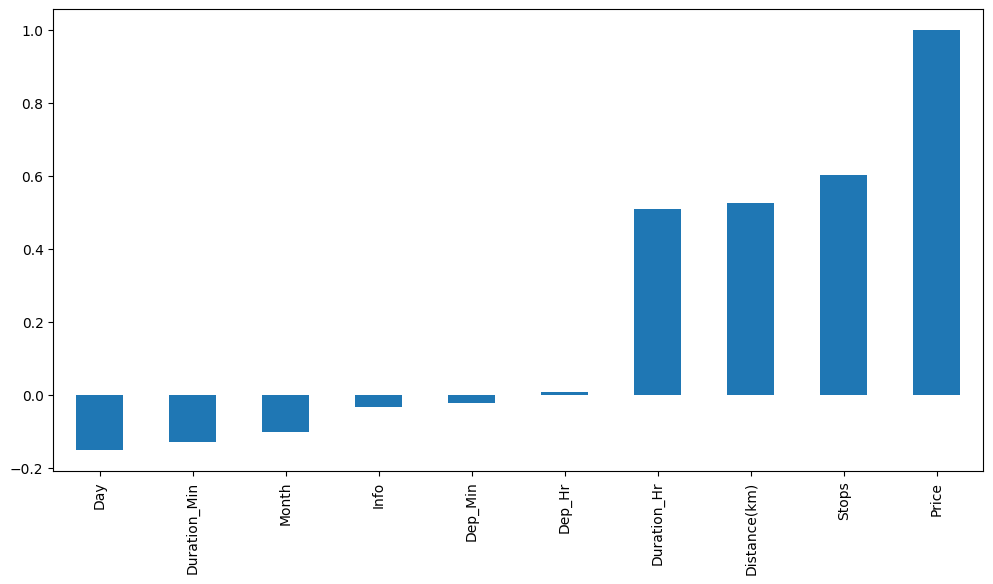

In [47]:
plt.figure(figsize=(12,6))
df.corr()['Price'].sort_values().plot(kind='bar');

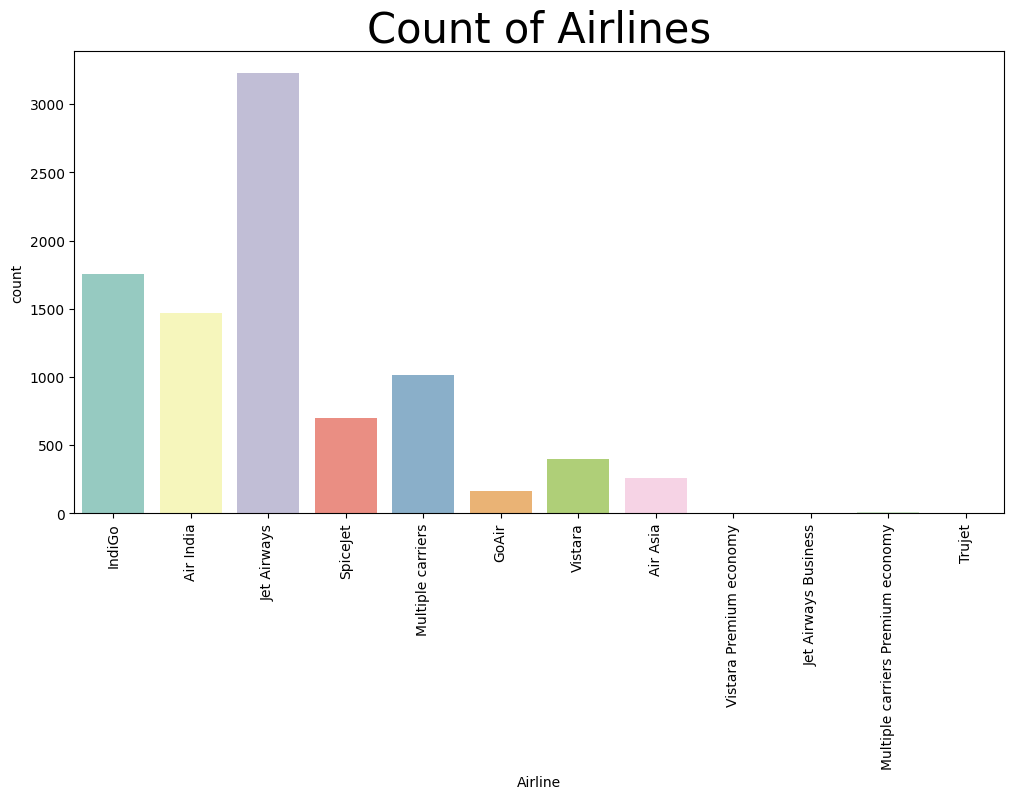

In [48]:
plt.figure(figsize=(12,6))
sns.countplot(x="Airline", data = df, palette='Set3')
plt.title('Count of Airlines', size=30)
plt.xticks(rotation=90)
plt.show()

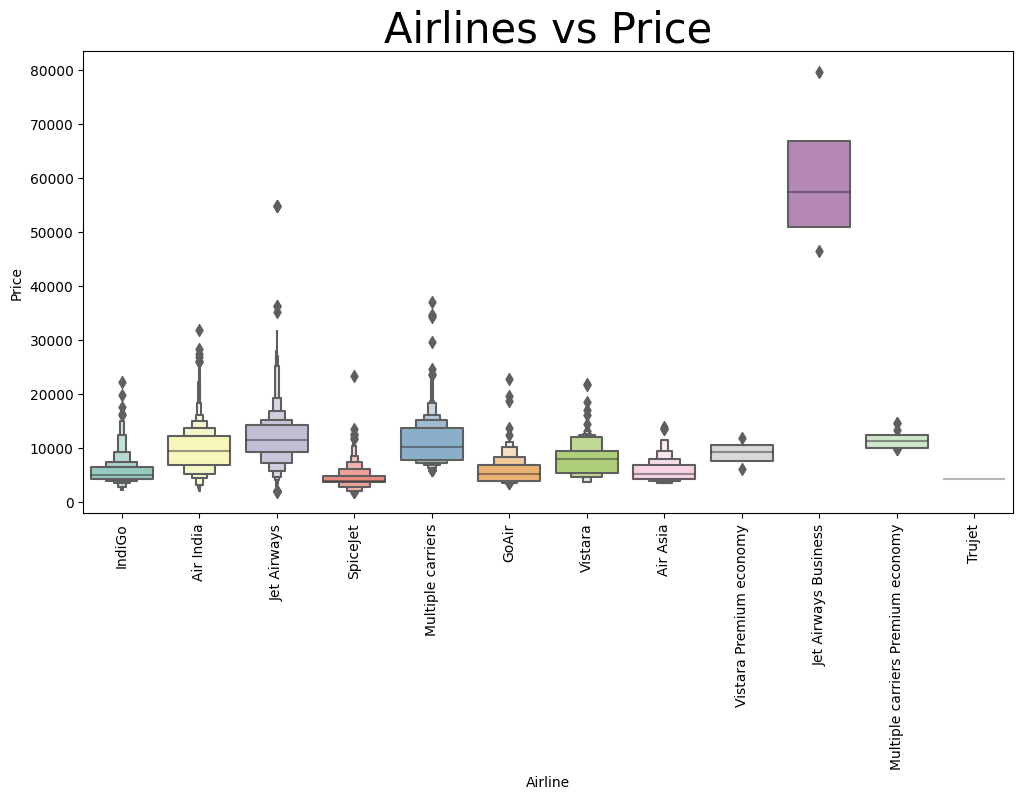

In [49]:
plt.figure(figsize=(12,6))
sns.boxenplot(x = 'Airline', y= 'Price', data=df, palette='Set3')
plt.title('Airlines vs Price', size=30)
plt.xticks(rotation=90)
plt.show()

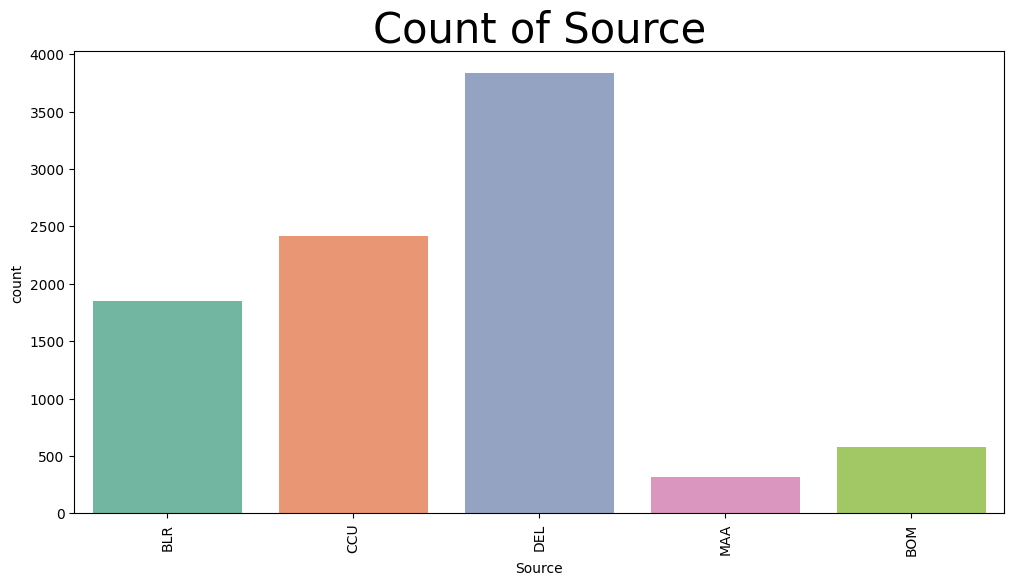

In [50]:
plt.figure(figsize=(12,6))
sns.countplot(x='Source', data = df, palette='Set2')
plt.title('Count of Source', size=30)
plt.xticks(rotation=90)
plt.show()

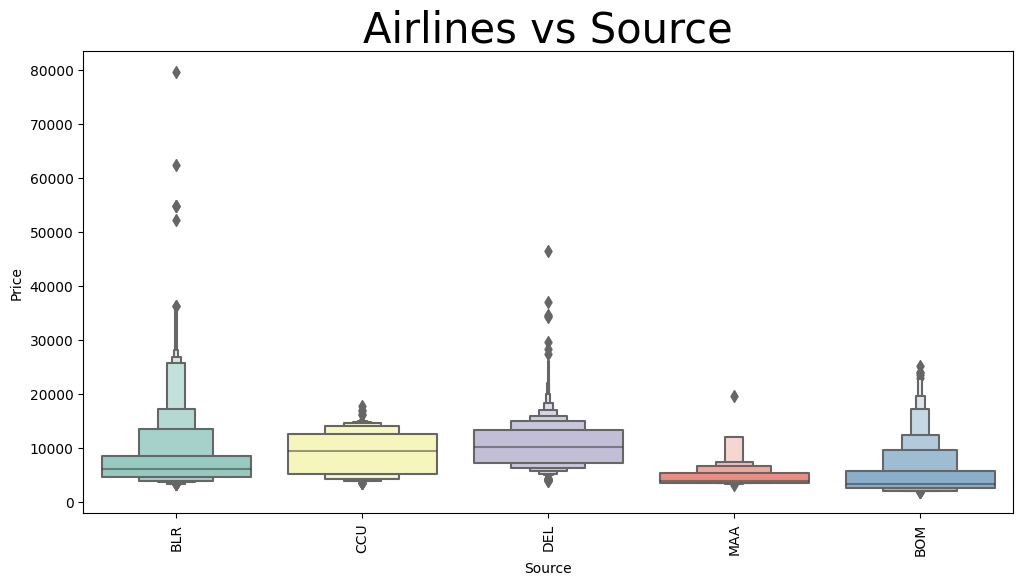

In [51]:
plt.figure(figsize=(12,6))
sns.boxenplot(x= 'Source', y= 'Price', data=df, palette='Set3')
plt.title('Airlines vs Source', size=30)
plt.xticks(rotation=90)
plt.show()

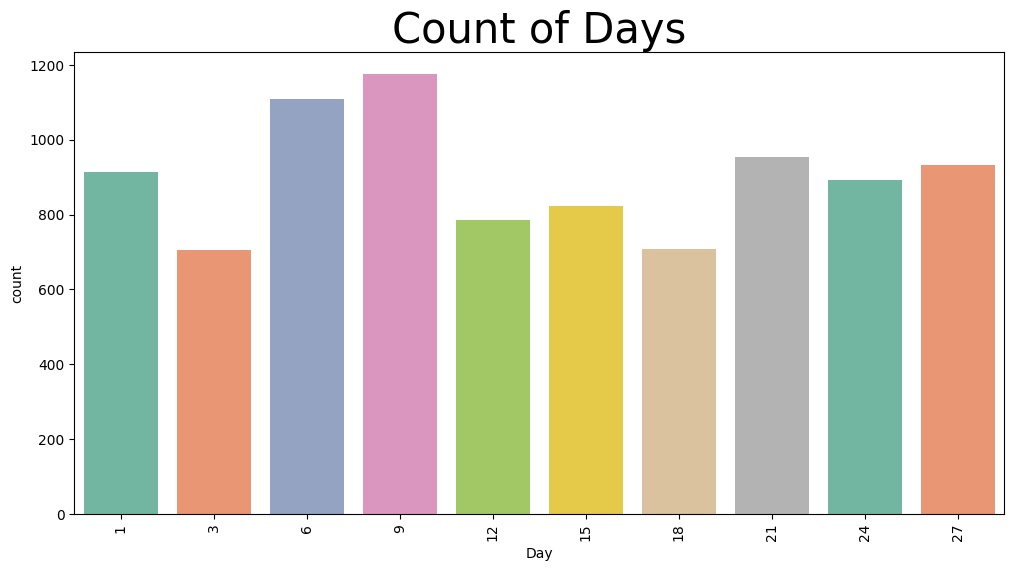

In [52]:
plt.figure(figsize=(12,6))
sns.countplot(x='Day', data= df, palette='Set2')
plt.title('Count of Days', size=30)
plt.xticks(rotation=90)
plt.show()

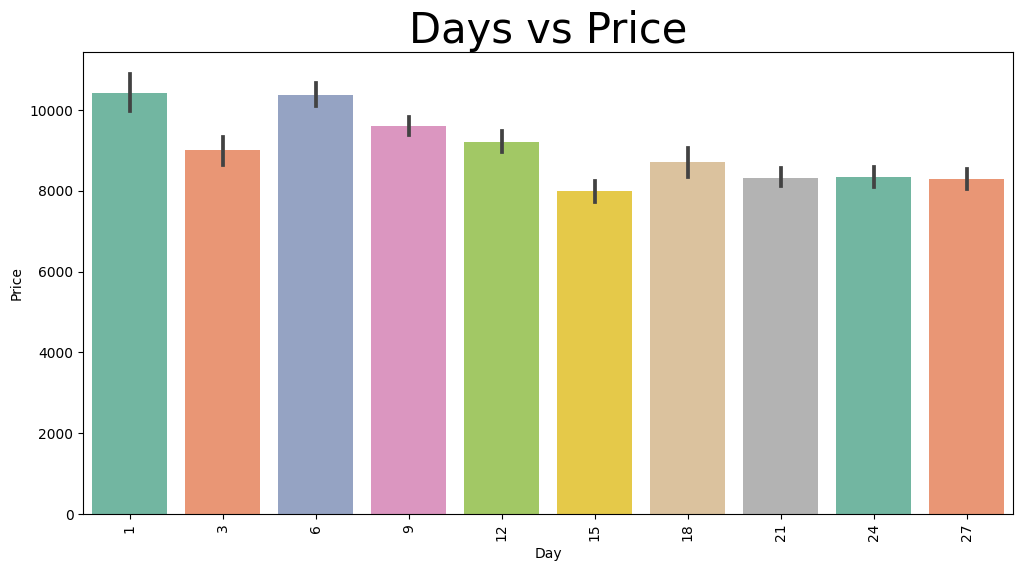

In [53]:
plt.figure(figsize=(12,6))
sns.barplot(x='Day', y='Price', data=df, palette='Set2')
plt.title('Days vs Price', size=30)
plt.xticks(rotation=90)
plt.show()

In [54]:
df['Month'] = df['Month'].map({
    1:'JAN',
    2:'FEB',
    3:'MAR',
    4:'APR',
    5:'MAY',
    6:'JUN',
    7:'JUL',
    8:'AUG',
    9:'SEP',
    10:'OCT',
    11:'NOV',
    12:'DEC'
})

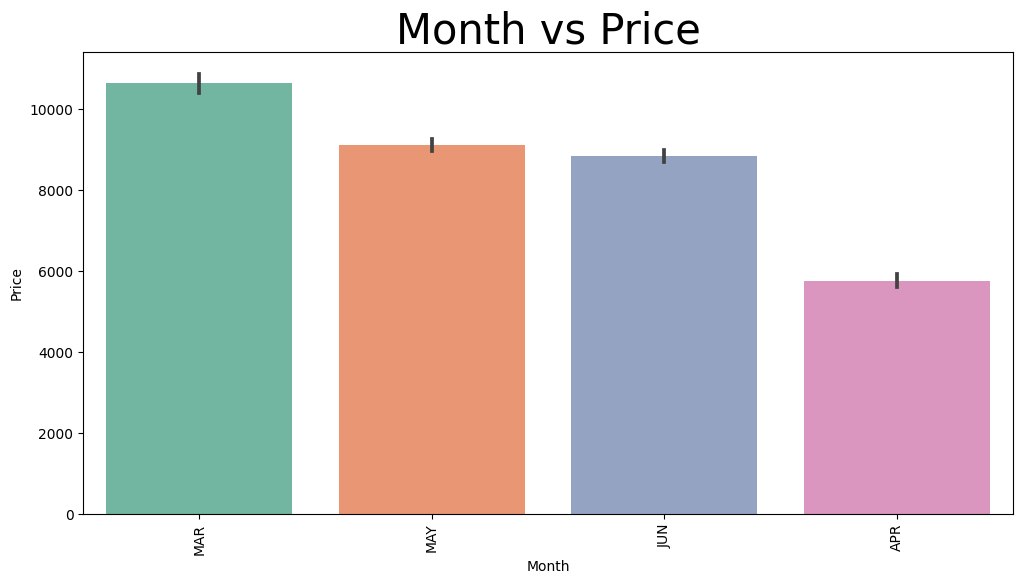

In [55]:
plt.figure(figsize=(12,6))
sns.barplot(x='Month', y='Price', data=df, palette='Set2')
plt.title('Month vs Price', size=30)
plt.xticks(rotation=90)
plt.show()

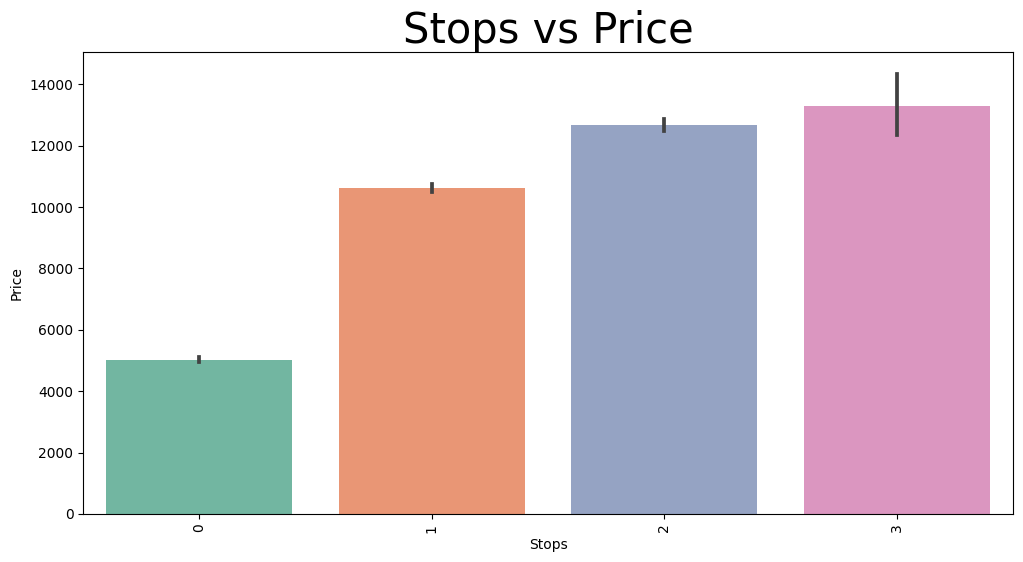

In [56]:
plt.figure(figsize=(12,6))
sns.barplot(x='Stops', y='Price', data=df, palette='Set2')
plt.title('Stops vs Price', size=30)
plt.xticks(rotation=90)
plt.show()

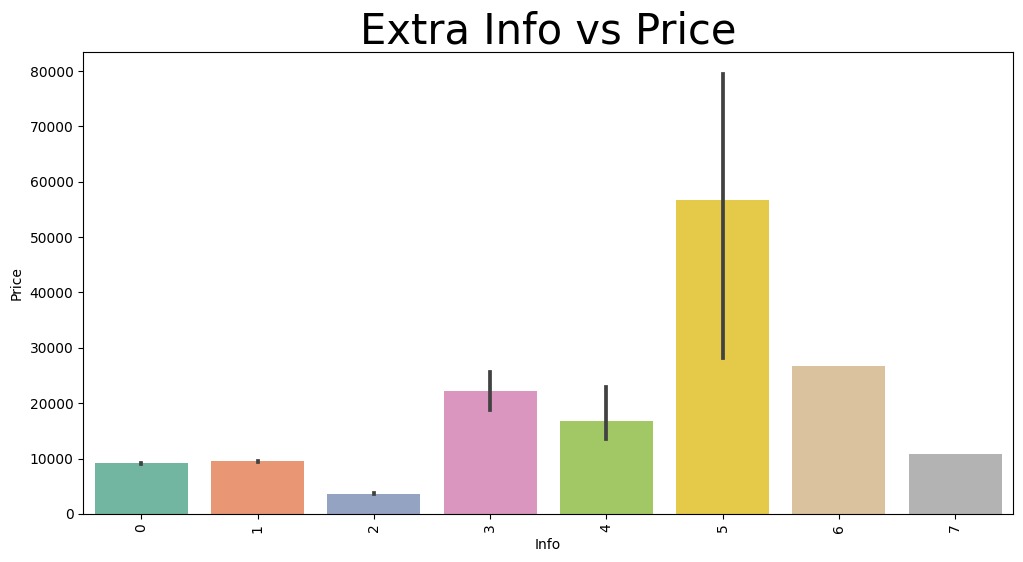

In [57]:
plt.figure(figsize=(12,6))
sns.barplot(x='Info', y='Price', data=df, palette='Set2')
plt.title('Extra Info vs Price', size=30)
plt.xticks(rotation=90)
plt.show()

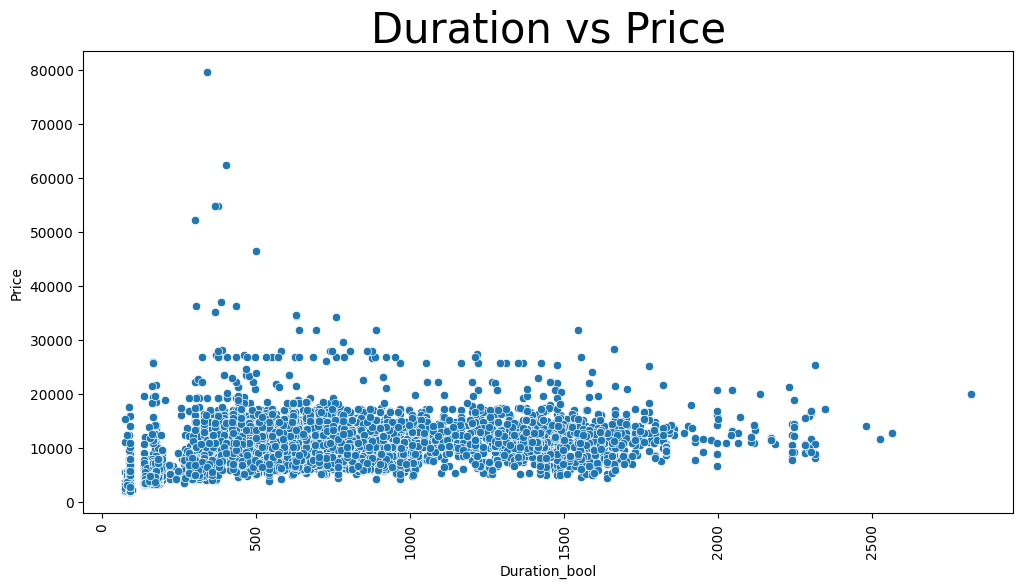

In [58]:
df['Duration_bool'] = (df['Duration_Hr']*60)+df['Duration_Min']
plt.figure(figsize=(12,6))
sns.scatterplot(x= 'Duration_bool', y ='Price', data=df, palette='Set2')
plt.title('Duration vs Price', size=30)
plt.xticks(rotation=90)
plt.show()

In [59]:
ncol=["Duration_bool"]          
for i in ncol:
    q75, q25 = np.percentile(df.loc[:,i], [75 ,25])
    iqr = q75 - q25
    min = q25 - (iqr*1.5)
    max = q75 + (iqr*1.5)
    df = df.drop(df[df.loc[:,i] <= min].index)
    df = df.drop(df[df.loc[:,i] >= max].index)
    

df = df.dropna()
df1 = df[['Airline', 'Source', 'Dest', 'Stops',
         'Info', 'Price', 'Day', 'Month', 'Distance(km)', 'Duration_bool']]
df1 = df1.rename(columns={'Duration_bool': 'Duration'})
df1['Month'] = df1['Month'].map({
    'JAN':1,
    'FEB':2,
    'MAR':3,
    'APR':4,
    'MAY':5,
    'JUN':6,
    'JUL':7,
    'AUG':8,
    'SEP':9,
    'OCT':10,
    'NOV':11,
    'DEC':12
})
df.head(2)

,Airline,Source,Dest,Route Map,Stops,Info,Price,Day,Month,Distance(km),Dep_Hr,Dep_Min,Duration_Hr,Duration_Min,Duration_bool
0,IndiGo,BLR,DEL,BLR → DEL,0,0,3897,24,MAR,1709.71,22,20,2,50,170
1,Air India,CCU,BLR,CCU → IXR → BBI → BLR,2,0,7662,1,MAY,1838.55,5,50,7,25,445


In [60]:
X = df1.drop('Price', axis=1)
y = df1['Price']

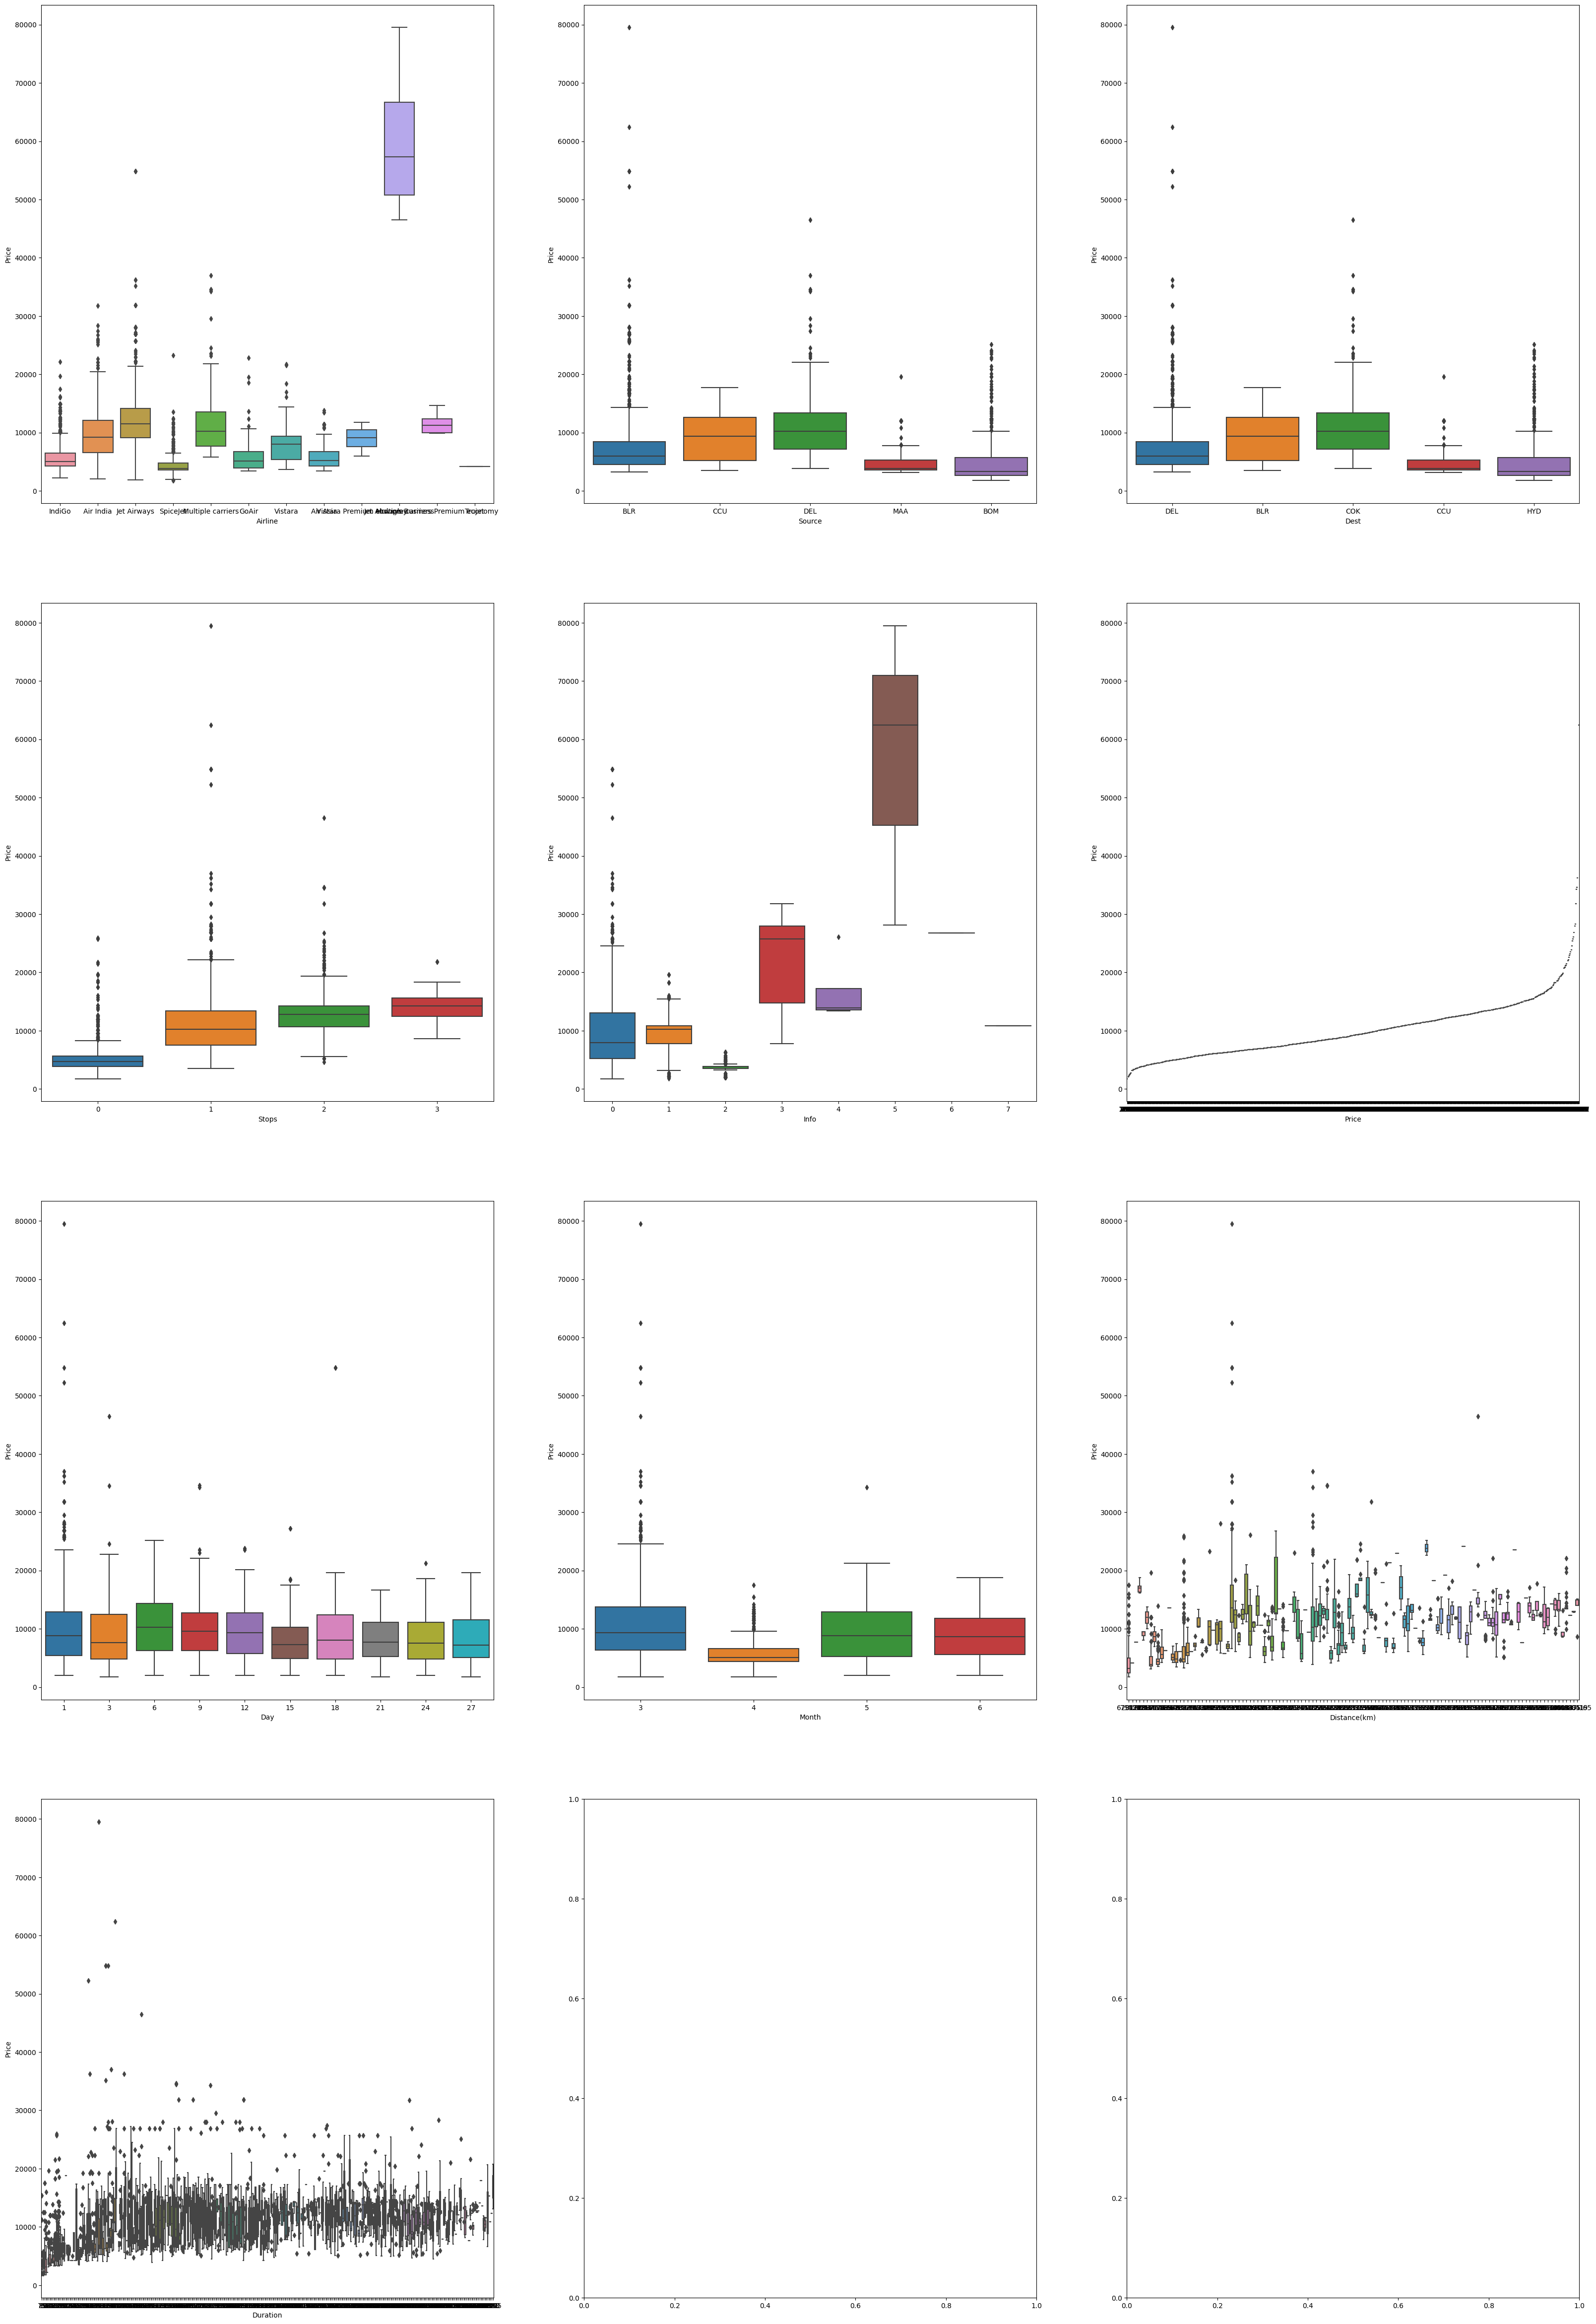

In [61]:
# set figure size
fig, ax = plt.subplots(4, 3, figsize=(40, 60))

# create box plot for categorical variables
for var, subplot in zip(df1.columns, ax.flatten()):
    sns.boxplot(x=var, y='Price', data=df1, ax=subplot)

In [62]:
df1.to_csv('final_airfare.csv', index=False)

In [63]:
# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm

# import 'stats'
from scipy import stats

# 'metrics' from sklearn is used for evaluating the model performance
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


# import function to perform linear regression
from sklearn.linear_model import LinearRegression

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import SGDRegressor from sklearn to perform linear regression with stochastic gradient descent
from sklearn.linear_model import SGDRegressor

# import function for ridge regression
from sklearn.linear_model import Ridge

# import function for lasso regression
from sklearn.linear_model import Lasso

# import function for elastic net regression
from sklearn.linear_model import ElasticNet

# import function to perform GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

# import functions to perform cross validation
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [64]:
df = pd.read_csv('./final_airfare.csv')

# display first two observations using head()
df.head(2)

,Airline,Source,Dest,Stops,Info,Price,Day,Month,Distance(km),Duration
0,IndiGo,BLR,DEL,0,0,3897,24,3,1709.710000,170
1,Air India,CCU,BLR,2,0,7662,1,5,1838.550000,445


In [65]:
# store the target variable 'PRICE' in a dataframe 'df_target'
df_target = df['Price']
df_feature = df.drop('Price', axis = 1)

df_num = df_feature.select_dtypes(include = [np.number])

# display numerical features
print("display numerical features:\n",df_num.columns)


df_cat = df_feature.select_dtypes(include = [np.object])

# display categorical features
print("display categorical features:\n",df_cat.columns)

# use 'get_dummies' from pandas to create dummy variables
# use 'drop_first' to create (n-1) dummy variables
dummy_var = pd.get_dummies(data = df_cat, drop_first = True)

display numerical features:
 Index(['Stops', 'Info', 'Day', 'Month', 'Distance(km)', 'Duration'], dtype='object')
display categorical features:
 Index(['Airline', 'Source', 'Dest'], dtype='object')


In [66]:
# initialize the standard scalar
X_scaler = StandardScaler()

# scale all the numeric variables
# standardize all the columns of the dataframe 'df_num'
num_scaled = X_scaler.fit_transform(df_num)

# create a dataframe of scaled numerical variables
# pass the required column names to the parameter 'columns'
df_num_scaled = pd.DataFrame(num_scaled, columns = df_num.columns)

# standardize the target variable explicitly and store it in a new variable 'y'
y = (df_target - df_target.mean()) / df_target.std()

In [67]:
# concat the dummy variables with numeric features to create a dataframe of all independent variables
# 'axis=1' concats the dataframes along columns 
X = pd.concat([df_num_scaled, dummy_var], axis = 1)

# display first five observations
X.head(2)

,Stops,Info,Day,Month,Distance(km),Duration,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_BOM,Source_CCU,Source_DEL,Source_MAA,Dest_CCU,Dest_COK,Dest_DEL,Dest_HYD
0,-1.221463,-0.479818,1.240175,-1.470566,-0.614115,-0.939403,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,1.789648,-0.479818,-1.474359,0.249940,-0.391266,-0.374705,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


## Train-test split

In [68]:
# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10, test_size = 0.3)

# check the dimensions of the train & test subset using 'shape'
# print dimension of train set
print('X_train', X_train.shape)
print('y_train', y_train.shape)

# print dimension of test set
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (6254, 25)
y_train (6254,)
X_test (2681, 25)
y_test (2681,)


## Creating RMSE values for train set

In [69]:
# create a generalized function to calculate the RMSE values for train set
def get_train_rmse(model):
    
    # For training set:
    # train_pred: prediction made by the model on the training dataset 'X_train'
    # y_train: actual values ofthe target variable for the train dataset

    # predict the output of the target variable from the train data 
    train_pred = model.predict(X_train)

    # calculate the MSE using the "mean_squared_error" function

    # MSE for the train data
    mse_train = mean_squared_error(y_train, train_pred)

    # take the square root of the MSE to calculate the RMSE
    # round the value upto 4 digits using 'round()'
    rmse_train = round(np.sqrt(mse_train), 4)
    
    # return the training RMSE
    return(rmse_train)

## Creating RMSE values for test data

In [70]:
# create a generalized function to calculate the RMSE values test set
def get_test_rmse(model):
    
    # For testing set:
    # test_pred: prediction made by the model on the test dataset 'X_test'
    # y_test: actual values of the target variable for the test dataset

    # predict the output of the target variable from the test data
    test_pred = model.predict(X_test)

    # MSE for the test data
    mse_test = mean_squared_error(y_test, test_pred)

    # take the square root of the MSE to calculate the RMSE
    # round the value upto 4 digits using 'round()'
    rmse_test = round(np.sqrt(mse_test), 4)

    # return the test RMSE
    return(rmse_test)

## MAPE Calculation

In [71]:
# define a function to calculate MAPE
# pass the actual and predicted values as input to the function
# return the calculated MAPE 
def mape(actual, predicted):
    return (np.mean(np.abs((actual - predicted) / actual)) * 100)

def get_test_mape(model):
    
    # For testing set:
    # test_pred: prediction made by the model on the test dataset 'X_test'
    # y_test: actual values of the target variable for the test dataset

    # predict the output of the target variable from the test data
    test_pred = model.predict(X_test)
    
    # calculate the mape using the "mape()" function created above
    # calculate the MAPE for the test data
    mape_test = mape(y_test, test_pred)

    # return the MAPE for the test set
    return(mape_test)

## Creating a function to update scorecard

In [72]:
# create a function to update the score card for comparision of the scores from different algorithms
# pass the model name, model build, alpha and l1_ration as input parameters
# if 'alpha' and/or 'l1_ratio' is not specified, the function assigns '-'
def update_score_card(algorithm_name, model, alpha = '-', l1_ratio = '-'):
    
    # assign 'score_card' as global variable
    global score_card

    # append the results to the dataframe 'score_card'
    # 'ignore_index = True' do not consider the index labels
    score_card = score_card.append({'Model_Name': algorithm_name,
                       'Alpha (Wherever Required)': alpha, 
                       'l1-ratio': l1_ratio, 
                       'Test_MAPE': get_test_mape(model), 
                       'Test_RMSE': get_test_rmse(model), 
                       'R-Squared': get_score(model)[0], 
                       'Adj. R-Squared': get_score(model)[1]}, ignore_index = True)

## Function to plot barplot 

In [73]:
# define a function to plot a barplot
# pass the model 
def plot_coefficients(model, algorithm_name):
    # create a dataframe of variable names and their corresponding value of coefficients obtained from model
    # 'columns' returns the column names of the dataframe 'X'
    # 'coef_' returns the coefficient of each variable
    df_coeff = pd.DataFrame({'Variable': X.columns, 'Coefficient': model.coef_})

    # sort the dataframe in descending order
    # 'sort_values' sorts the column based on the values
    # 'ascending = False' sorts the values in the descending order
    sorted_coeff = df_coeff.sort_values('Coefficient', ascending = False)

    # plot a bar plot with Coefficient on the x-axis and Variable names on y-axis
    # pass the data to the parameter, 'sorted_coeff' to plot the barplot
    sns.barplot(x = "Coefficient", y = "Variable", data = sorted_coeff)
    
    # add x-axis label
    # set the size of the text using 'fontsize'
    plt.xlabel("Coefficients from {}".format(algorithm_name), fontsize = 15)

    # add y-axis label
    # set the size of the text using 'fontsize'
    plt.ylabel('Features', fontsize = 15)

## Function to generated R-squared and Adj R-squared

In [74]:
# define a function to get R-squared and adjusted R-squared value
def get_score(model):
    
    # score() returns the R-squared value
    r_sq = model.score(X_train, y_train)
    
    # calculate adjusted R-squared value
    # 'n' denotes number of observations in train set
    # 'shape[0]' returns number of rows 
    n = X_train.shape[0]
    
    # 'k' denotes number of variables in train set
    # 'shape[1]' returns number of columns
    k = X_train.shape[1]
    
    # calculate adjusted R-squared using the formula
    r_sq_adj = 1 - ((1-r_sq)*(n-1)/(n-k-1))
    
    # return the R-squared and adjusted R-squared value 
    return ([r_sq, r_sq_adj])

In [75]:
# n_splits: specify the number of k folds
kf = KFold(n_splits = 5)

In [76]:
# create a function 'get_score' that returns the R-squared score for the training set
# 'get_score' takes 5 input parameters
def Get_score(model, X_train_k, X_test_k, y_train_k, y_test_k):
    model.fit(X_train_k, y_train_k)                                   # fit the model
    return model.score(X_test_k, y_test_k)    

In [77]:
# create an empty list to store the scores
scores = []

# kf.split() splits the indices of X_train into train_index and test_index
# further dividing the X_train and y_train sets into train and test sets for cross validation
# Remember: Cross validation works on training set not on test set
# use '\' for stacking the code 
for train_index, test_index in kf.split(X_train):
    X_train_k, X_test_k, y_train_k, y_test_k = X_train.iloc[train_index], X_train.iloc[test_index], \
                                               y_train.iloc[train_index], y_train.iloc[test_index]
   
    # call the function 'get_scores()' and append the scores in the list 'scores'
    scores.append(Get_score(LinearRegression(), X_train_k, X_test_k, y_train_k, y_test_k)) 
    
# print all scores
print('All scores: ', scores)

# print the minimum score from the list
# use 'round()' to round-off the minimum score upto 4 digits
# min() returns minimum score 
print("\nMinimum score obtained: ", np.min(scores))

# print the maximum score from the list
# use 'round()' to round-off the maximum score upto 4 digits
# max() returns maximum score 
print("Maximum score obtained: ", np.max(scores))

# print the average score from the list
# use 'round()' to round-off the average score upto 4 digits
# np.mean() returns average score 
print("Average score obtained: ", np.mean(scores))

All scores:  [0.583402449363021, 0.6215639618731148, 0.5779648965672155, 0.6145383837471873, -1.1033139815909515e+17]

Minimum score obtained:  -1.1033139815909515e+17
Maximum score obtained:  0.6215639618731148
Average score obtained:  -2.206627963181903e+16


In [78]:
# using cross_val_score() for k-fold cross validation
# estimator: pass the machine learning function. Here we are performing linear regression
# pass the X_train and y_train sets
# cv: stands for number of folds. Similar to k in KFold
# scoring: pass the scoring parameter e.g. 'r2' for r-squared, 'neg_mean_squared_error' for mean squared error (negative)
scores = cross_val_score(estimator = LinearRegression(), 
                         X = X_train, 
                         y = y_train, 
                         cv = 5, 
                         scoring = 'r2')

In [79]:
# print all scores
print('All scores: ', scores)

# print the minimum score from the list
# use 'round()' to round-off the minimum score upto 4 digits
# min() returns minimum score 
print("\nMinimum score obtained: ", round(np.min(scores), 4))

# print the maximum score from the list
# use 'round()' to round-off the maximum score upto 4 digits
# max() returns maximum score 
print("Maximum score obtained: ", round(np.max(scores), 4))

# print the average score from the list
# use 'round()' to round-off the average score upto 4 digits
# np.mean() returns average score 
print("Average score obtained: ", round(np.mean(scores), 4))

All scores:  [ 5.83402449e-01  6.21563962e-01  5.77964897e-01  6.14538384e-01
 -1.10331398e+17]

Minimum score obtained:  -1.1033139815909515e+17
Maximum score obtained:  0.6216
Average score obtained:  -2.206627963181903e+16


In [80]:
# create an empty to store the MSE for each model
loocv_rmse = []

# instantiate the LOOCV method 
loocv = LeaveOneOut()

# use the for loop to build the regression model for each cross validation 
# use split() to split the dataset into two subsets; one with (n-1) data points and another with 1 data point
# where, n = total number of observations

for train_index, test_index in loocv.split(X_train):
    # create the train dataset, use iloc[] to retrieve the corresponding observations in train data
    # create the test dataset, use iloc[] to retrieve the corresponding observations in test data
    # # use '\' for stacking the code 
    X_train_l, X_test_l, y_train_l, y_test_l = X_train.iloc[train_index], X_train.iloc[test_index], \
                                               y_train.iloc[train_index], y_train.iloc[test_index]
    
    # instantiate the regression model
    linreg = LinearRegression()
    
    # fit the model on training dataset
    linreg.fit(X_train_l, y_train_l)
    
    # calculate MSE using test dataset
    # use predict() to predict the values of target variable
    mse = mean_squared_error(y_test_l, linreg.predict(X_test_l))
    
    # calculate the RMSE
    rmse = np.sqrt(mse)
    
    # use append() to add each RMSE to the list 'loocv_rmse'
    loocv_rmse.append(rmse)

In [81]:
# print the minimum rmse from the list
# use 'round()' to round-off the minimum rmse upto 4 digits
# min() returns minimum rmse 
print("\nMinimum rmse obtained: ", round(np.min(loocv_rmse), 4))

# print the maximum rmse from the list
# use 'round()' to round-off the maximum rmse upto 4 digits
# max() returns maximum rmse 
print("Maximum rmse obtained: ", round(np.max(loocv_rmse), 4))

# print the average rmse from the list
# use 'round()' to round-off the average rmse upto 4 digits
# np.mean() returns average rmse 
print("Average rmse obtained: ", round(np.mean(loocv_rmse), 4))


Minimum rmse obtained:  0.0001
Maximum rmse obtained:  3952236962.6924
Average rmse obtained:  631953.8728


In [82]:
models = [['LinearRegression', LinearRegression(),'na'],
          ['ElasticNet', ElasticNet(), [{'alpha':[0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 20, 40, 60],
                      'l1_ratio':[0.0001, 0.0002, 0.001, 0.01, 0.1, 0.2]}]],
          ['Lasso', Lasso(), [{'alpha':[0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 20]}]],
          ['Ridge', Ridge(), [{'alpha':[1e-4,1e-3, 1e-2, 0.1, 1, 5, 10, 20, 40, 60, 80, 100]}]],
          ['GradientBoostingRegressor', GradientBoostingRegressor(), 'na'],
         ['SGDRegressor', SGDRegressor(), 'na']]

In [83]:
# create an empty dataframe to store the scores for various algorithms
score_card = pd.DataFrame(columns=['Model_Name', 'Alpha (Wherever Required)', 'l1-ratio', 'R-Squared',
                                       'Adj. R-Squared', 'Test_RMSE', 'Test_MAPE'])

for name, model, grid in models:
    model=model
    if grid == 'na':
        model.fit(X_train, y_train)
        update_score_card(algorithm_name = name, model = model)
    else:
        model = GridSearchCV(estimator = model, 
                          param_grid = grid, 
                          cv = 10)
        model.fit(X_train, y_train)
        update_score_card(algorithm_name = name, model = model, alpha = model.best_params_.get('alpha'),
                         l1_ratio = model.best_params_.get('l1_ratio'))
# sort the dataframe 'score_card' on 'Test_RMSE' in an ascending order using 'sort_values' 
# 'reset_index' resets the index of the dataframe
# 'drop = True' drops the previous index
score_card = score_card.sort_values('Test_RMSE').reset_index(drop = True)

# color the cell in the column 'Test_RMSE' having minimum RMSE value
# 'style.highlight_min' assigns color to the minimum value
# pass specified color to the parameter, 'color'
# pass the data to limit the color assignment to the parameter, 'subset' 
score_card.style.highlight_min(color = 'lightblue', subset = 'Test_RMSE')

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE
0,GradientBoostingRegressor,-,-,0.834096,0.833430,0.387700,82.744262
1,ElasticNet,0.000100,0.200000,0.616437,0.614897,0.590600,136.275176
2,Ridge,0.100000,None,0.621233,0.619712,0.615200,135.834600
3,Lasso,0.000100,None,0.621497,0.619978,0.624500,135.599727
4,LinearRegression,-,-,0.621610,0.620091,0.631800,135.665373
5,SGDRegressor,-,-,0.575848,0.574145,0.670100,137.568407


## 2. Module Creation

In [84]:
gradBoost = GradientBoostingRegressor()
gradBoost.fit(X_train, y_train)
prediction = gradBoost.predict(X_test)
print('RMSE : {}'.format(np.sqrt(mean_squared_error(y_test, prediction))))

RMSE : 0.3876990229902486


In [85]:
gradBoost.score(X_train, y_train), gradBoost.score(X_test, y_test)

(0.8340958488952346, 0.8513860966526166)

In [86]:
print('MAE:', mean_absolute_error(y_test, prediction))
print('MSE:', mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(mean_squared_error(y_test, prediction)))

MAE: 0.2612347663124806
MSE: 0.15031053242759332
RMSE: 0.3876990229902486


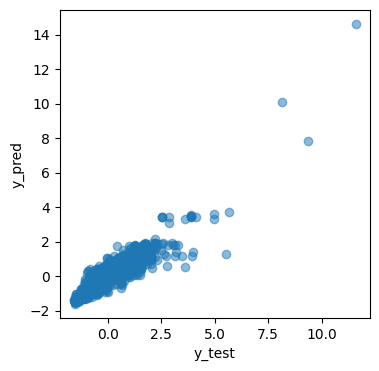

In [87]:
plt.figure(figsize = (4,4))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

# Create a Pipeline and Save Predictive Model:

In [88]:
import pickle
file = open('final_model.pkl', 'wb')
pickle.dump(gradBoost, file)

In [89]:
model = open("final_model.pkl", "rb")
gradBoost = pickle.load(model)

In [90]:
from sklearn import metrics
predictions2=gradBoost.predict(X_test)
metrics.r2_score(y_test,predictions2)

0.8513860966526166

**So we have created predictive model and permanently saved in hard-drive with all the required pre-processing steps and whenever the new data to be tested**